1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
- Ensemble tech are used to impove the prediction of our model through taking several model at once and giving the appoprite result according to all the models .
- bagging is used to reduce variance and prevent overfiting
- bossting reduce bias by sequential learning.


2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
- Random Forest Classifier reduces overfitting compared to a single decision tree because it trains several trees with same data set without learning the details of noice and aggregation predict the result thorugh the avg of each model through this model accuracy increse and overfitting reduces.

3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
- Stacking is a technique in which different models gives some result as per the requirement and then a major model came. And train with that. To make the prediction more Accurate Whereas in begging, Uh We create several models. and take the voting of the their Result. As per the requirement, And in boosting We make model sequentially and Each model do What the previous model didn't do correctly.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
- OOB or out of bag is the numeric value in a random forest is an internal accuracy that tells how much a model will score to an unseen data (it is checked by interally in random forest ) replacement is also done between them .

5. Compare AdaBoost and Gradient Boosting in terms of: How they handle errors from weak learners ,
   Weight adjustment mechanism , Typical use cases
- weight adjustment reweights samples after each round where as Gradient use gradient of lose function
- Adaboost 	Increases weights of misclassified samples Grandient Fits to residuals (gradients) of previous ensemble.
6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
- CatBoost performs well on categorical features without requiring extensive preprocessing because it uses a specialized method to transform categorical variables into numerical representations automatically. CatBoost calculates statistics from historical data using a permutation-driven approach that prevents target leakage.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Without Scaling - Accuracy:", accuracy_score(y_test, y_pred))
print("Without Scaling - Classification Report:\n", classification_report(y_test, y_pred))

Without Scaling - Accuracy: 0.6666666666666666
Without Scaling - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.64      0.70      0.67        20
           2       0.46      0.43      0.44        14

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.67      0.67      0.67        54



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)


print("With Scaling - Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("With Scaling - Classification Report:\n", classification_report(y_test, y_pred_scaled))


With Scaling - Accuracy: 0.9629629629629629
With Scaling - Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.90      0.95        20
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
knn_gs = KNeighborsClassifier()
grid_search = GridSearchCV(knn_gs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Optimized KNN - Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized KNN - Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Optimized KNN - Accuracy: 0.9814814814814815
Optimized KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class)

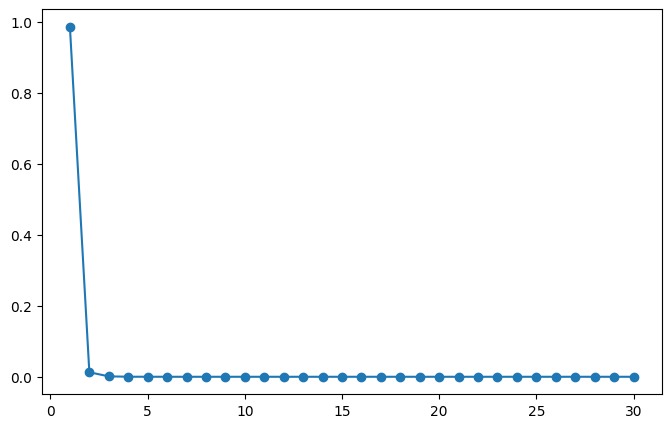

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
data = load_breast_cancer()
x= data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2)


from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_train)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')

pca_95=PCA(n_components=0.95)
X_train_pca_95=pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
clf.fit(X_train_pca_95, y_train)
pca_acc = clf.score(X_test_pca, y_test)


print(f"Accuracy (Original): {score:.3f}")
print(f"Accuracy (PCA, 95% variance): {pca_acc:.3f}")

Accuracy (Original): 0.918
Accuracy (PCA, 95% variance): 0.918


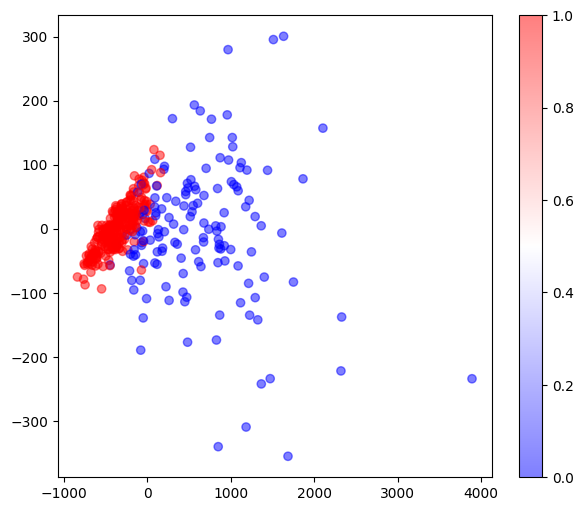

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
X_train_2d = PCA(n_components=2).fit_transform(X_train)

plt.figure(figsize=(7, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='bwr', alpha=0.5)
plt.colorbar()
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


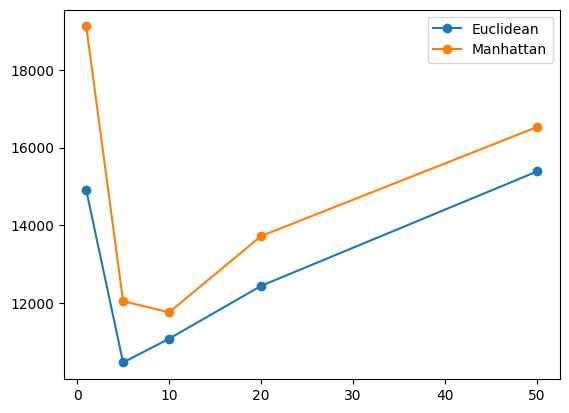

In [13]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
x,y=make_regression(n_samples=500, n_features=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2)
knn = KNeighborsRegressor()
K_values=[1, 5, 10, 20, 50]

results=[]

for k in K_values:
  for metric in ['euclidean', 'manhattan']:
    model = KNeighborsRegressor(n_neighbors=k, metric=metric)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    results.append((k, metric, mse))


for metric in ['euclidean', 'manhattan']:
    plt.plot([k for k, m, _ in results if m == metric],
             [mse for _, m, mse in results if m == metric],
             label=metric.capitalize(), marker='o')


plt.legend()
plt.show()

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


In [ ]:
from sklearn.datasets import pima_in
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier